# Inference for regression parameters

It is often of interest to perform inference about the regression parameters that we have estimated thus far. The reason inference is useful is based on the idea that for most problems the sample is used to approximate the population. Therefore, a subset of the population (the sample) is used to estimate the population parameters that are of most interest. As such, our estimates come with error and this uncertainty we can quantify when making inference about the parameter estimates. 

In this course, I plan to show you two ways to perform this inference. One of those frameworks will be the classical approach which uses classical statistical theory to estimate the amount of uncertainty in the parameter estimates. The second approach will use the bootstrap as a way to computationally estimate the uncertainty. The benefit of the bootstrap is that it comes with fewer assumptions than the classical approach. We will build up to these arguments. 

## Classical Inferential Framework

The classical inferential framework, sometimes referred to as the null hypothesis significance test (NHST) has been around for more than 100 years. This framework builds off of the idea of a null hypothesis. 

A null hypothesis is typically thought as a hypothesis that assumes there is no relationship or a null effect. Framing this in the regression concept that we have been working with, we could define the following null hypotheses. 

$$
H_{0}: \beta_{0} = 0.\ The\  population\  yintercept\  equals\  0.
$$

or 

$$ 
H_{0}: \beta_{1} = 0.\ The\  population\  slope\  equals\  0.
$$

In the following two null hypotheses, represented with $H_{0}$, the population parameters are being assumed to be 0 in the population. This is one definition of a null effect, but is not the only null effect we can define (more on this later). The value defined as a null effect is important as it centers the sampling distribution used for evaluating where the sample estimate falls in that distribution. 

Another hypothesis is typically defined with the null hypothesis, called the alternative hypothesis. This hypothesis states that there is an effect. Within the linear regression framework, we could write the alternative hypotheses as:

$$ 
H_{A}: \beta_{0} \neq 0.\ The\  population\  yintercept\  is\  not\  equal\  to\  0.
$$

or 

$$ 
H_{A}: \beta_{1} \neq 0.\ The\  population\  slope\  is\  not\  equal\  to\  0. 
$$

In the following two alternative hypotheses, represented with $H_{A}$, the population parameters are assumed to be not equal to 0. These can also be one-sided, more on this with an example later. 

### Estimating uncertainty in parameter estimates
The standard error is used to estimate uncertainty or error in the parameter estimates due to having a sample from the population. More specifically, this means that the entire population is not used to estimate the parameter, therefore the estimate we have is very likely not equal exactly to the parameter. Instead, there is some sort of sampling error involved that we want to quantify. If the sample was collected well, ideally randomly, then the estimate should be unbiased. Unbiased here doesn't mean that the estimate equals the population parameter, rather, that through repeated sampling, the average of our sample estimates would equal the population parameter. 

As mentioned, standard errors are used to quantify this uncertainty. In the linear regression case we have explored so far, there are mathematical formula for the standard errors. These are shown below. 

$$
SE\left( \hat{\beta}_{0} \right) = \sqrt{\hat{\sigma}^2 \left( \frac{1}{n} + \frac{\bar{X}^2}{\sum \left( X - \bar{X} \right)^2} \right)}
$$

and

$$
SE\left( \hat{\beta}_{1} \right) = \sqrt{\frac{\hat{\sigma}^2}{\sum \left( X - \bar{X} \right)^2}}
$$

In the equation above, $\hat{\sigma}^2$, is equal to $\sqrt{\frac{SS_{error}}{n - 2}}$, and $n$ is the sample size (ie, number of rows of data in the model). 

#### Matrix Representation
It is also possible, and more easily extendable, to write the standard error computations or the variance of the estimated parameters in matrix representation. This framework extends beyond the single predictor case (ie. one $X$), therefore is more readily used in practice. 

$$
\hat{var}\left({\hat{\beta}}\right) = \hat{\sigma}^2 \left( \mathbf{X}^{`}\mathbf{X} \right)^{-1}
$$

In the equation above, $\hat{\sigma}^2$, is equal to $\sqrt{\frac{SS_{error}}{n - 2}}$, and $\mathbf{X}$ is the design matrix from the regression analysis. Finally, to get the standard errors back, you take the square root of the diagonal elements. 

$$
SE\left( \hat{\beta} \right) = \sqrt{diag\left(\hat{\sigma}^2 \left( \mathbf{X}^{`}\mathbf{X} \right)^{-1}\right)}

### Data
The  data for this section of notes will explore data from the [Environmental Protection Agency on Air Quality](https://www.epa.gov/outdoor-air-quality-data) collected for the state of Iowa in 2021. The data are daily values for PM 2.5 particulates. The attributes included in the data are shown below with a short description.

| Variable | Description | 
|:---------|:------------|
| date      | Date of observation |
| id | Site ID |
| poc | Parameter Occurrence Code (POC) |
| pm2.5 | Average daily pm 2.5 particulate value, in (ug/m3; micrograms per meter cubed) |
| daily_aqi | Average air quality index |
| site_name | Site Name |
| aqs_parameter_desc | Text Description of Observation |
| cbsa_code | Core Based Statistical Area (CBSA) ID |
| cbsa_name | CBSA Name |
| county | County in Iowa |
| avg_wind | Average daily wind speed (in knots) | 
| max_wind | Maximum daily wind speed (in knots) | 
| max_wind_hours | Time of maximum daily wind speed |


#### Guiding Question
How is average daily wind speed related to the daily air quality index?

In [1]:
library(tidyverse)
library(ggformula)
library(mosaic)

theme_set(theme_bw(base_size = 18))

airquality <- readr::read_csv("https://raw.githubusercontent.com/lebebr01/psqf_6243/main/data/iowa_air_quality_2021.csv")
wind <- readr::read_csv("https://raw.githubusercontent.com/lebebr01/psqf_6243/main/data/daily_WIND_2021-iowa.csv")

airquality <- airquality %>%
   left_join(wind, by = c('cbsa_name', 'date')) %>% 
   drop_na()

-- Attaching packages --------------------------------------- tidyverse 1.3.2 --
v ggplot2 3.3.6      v purrr   0.3.4 
v tibble  3.1.8      v dplyr   1.0.10
v tidyr   1.2.1      v stringr 1.4.1 
v readr   2.1.2      v forcats 0.5.2 
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
Loading required package: ggstance


Attaching package: 'ggstance'


The following objects are masked from 'package:ggplot2':

    GeomErrorbarh, geom_errorbarh


Loading required package: scales


Attaching package: 'scales'


The following object is masked from 'package:purrr':

    discard


The following object is masked from 'package:readr':

    col_factor


Loading required package: ggridges


New to ggformula?  Try the tutorials: 
	learnr::run_tutorial("introduction", package = "ggformula")
	learnr::run_tutorial("refining", package = "ggformula")

Registered S3 method overwritten by 'mosaic':
 

In [2]:
air_lm <- lm(daily_aqi ~ avg_wind, data = airquality)
coef(air_lm)
summary(air_lm)$r.square
summary(air_lm)$sigma

(Intercept)    avg_wind 
  48.222946   -2.211798

[1] 0.08528019

[1] 18.05479

In [3]:
sum_x <- airquality %>%
    summarise(mean_wind = mean(avg_wind),
              sum_dev_x_sq = sum( (avg_wind - mean_wind) ^ 2))
sum_x

mean_wind,sum_dev_x_sq
<dbl>,<dbl>
4.265731,29937.18


In [4]:
se_b0 <- sqrt(summary(air_lm)$sigma^2 * ((1 / nrow(airquality)) + ( sum_x[['mean_wind']]^2 / sum_x[['sum_dev_x_sq']]) ))
se_b1 <- sqrt(summary(air_lm)$sigma^2 / sum_x[['sum_dev_x_sq']])

se_b0
se_b1

[1] 0.51551

[1] 0.1043487

In [5]:
X <- model.matrix(air_lm)

var_b <- summary(air_lm)$sigma^2 * solve(t(X) %*% X)
var_b 

sqrt(diag(var_b))

,(Intercept),avg_wind
(Intercept),0.26575054,-0.04644803
avg_wind,-0.04644803,0.01088865


(Intercept)    avg_wind 
  0.5155100   0.1043487

In [6]:
summary(air_lm)$coefficients[,2]

(Intercept)    avg_wind 
  0.5155100   0.1043487

### Moving toward inference

Now that there the parameters are estimated and the amount of uncertainty is quantified, inference is possible. There are two related pieces that can be computed now, a confidence interval and/or the test-statistic and p-value. Let's go through both. 

First, a confidence interval can be computed. Confidence intervals take the following general form:

$$
\hat{\beta} \pm C * SE
$$

Where, $\hat{\beta}$ is the parameter estimate, $C$ is the confidence level, and $SE$ is the standard error. The parameter estimates and standard errors are what we have already established, the $C$ is the confidence level. This indicates the percentage of times, over the long run/repeated sampling, that the interval will capture the population parameter. Historically, this value is often specified as 95%, but any value is theoretically possible. 

The $C$ value represents a quantile from a mathematical distribution that separates the middle percetage desired (ie, 95%) from the rest of the distribution. The mathematical distribution is most often the t-distribution, but the difference between a t-distribution and normal distribution are modest once the sample size is greater than 30 or so. 

The figure below tries to highlight the $C$ value. 

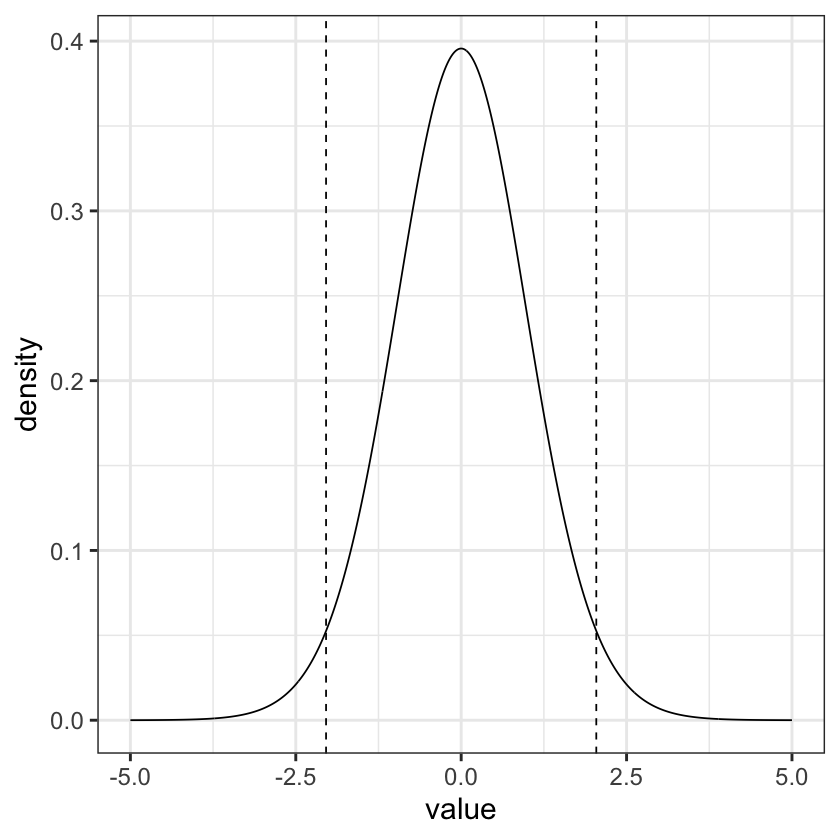

In [7]:
t_30 <- data.frame(value = seq(-5, 5, .01), density = dt(seq(-5, 5, .01), df = 30))
gf_line(density ~ value, data = t_30) %>%
  gf_vline(xintercept = ~ qt(.025, df = 30), linetype = 2) %>%
  gf_vline(xintercept = ~ qt(.975, df = 30), linetype = 2)

In [8]:
coef(air_lm)
summary(air_lm)$coefficients[,2]

(Intercept)    avg_wind 
  48.222946   -2.211798

(Intercept)    avg_wind 
  0.5155100   0.1043487

In [9]:
abs(qt(.025, df = nrow(airquality) -2))

[1] 1.960456

In [10]:
48.2 + c(-1, 1) * 1.96 * .5155

[1] 47.18962 49.21038

In [11]:
-2.211 + c(-1, 1) * 1.96 * .1043

[1] -2.415428 -2.006572

### Inference with test statistics

It is also possible to do inference with a test statistic and computation of a p-value. Inference in this framework can be summarized into the following steps:

1. Generate hypotheses, ie null and alternative hypotheses.
2. Establish an $\alpha$ value
3. Estimate parameters
4. Compute test statistic
5. Generate p-value

An $\alpha$ value is the level of significance and represents the probability of obtaining the results due to chance. This is a value that the researcher can select. For a 5% $\alpha$ value, this is what was used above to compute the confidence intervals. 

The test statistic is computed as follows:

$$
test\ stat = \frac{\hat{\beta} - hypothesized\ value}{SE(\hat{\beta})}
$$

where $\hat{\beta}$ is the estimated parameter, $SE(\hat{\beta})$ is the standard error of the parameter estimate, and the $hypothesized\ value$ is the hypothesized value from the null hypothesis. This is often 0, but does not need to be zero. 

Let's assume the following null/alternative hypotheses:

$$ 
H_{0}: \beta_{1} = 0  \\
H_{A}: \beta_{1} \neq 0
$$

Let's use R to compute this test statistic.

In [12]:
t = (-2.211 - 0) / .1043
t

[1] -21.19847

In [13]:
pt(-21.198, df = nrow(airquality) -2, lower.tail = TRUE)

[1] 1.003866e-95

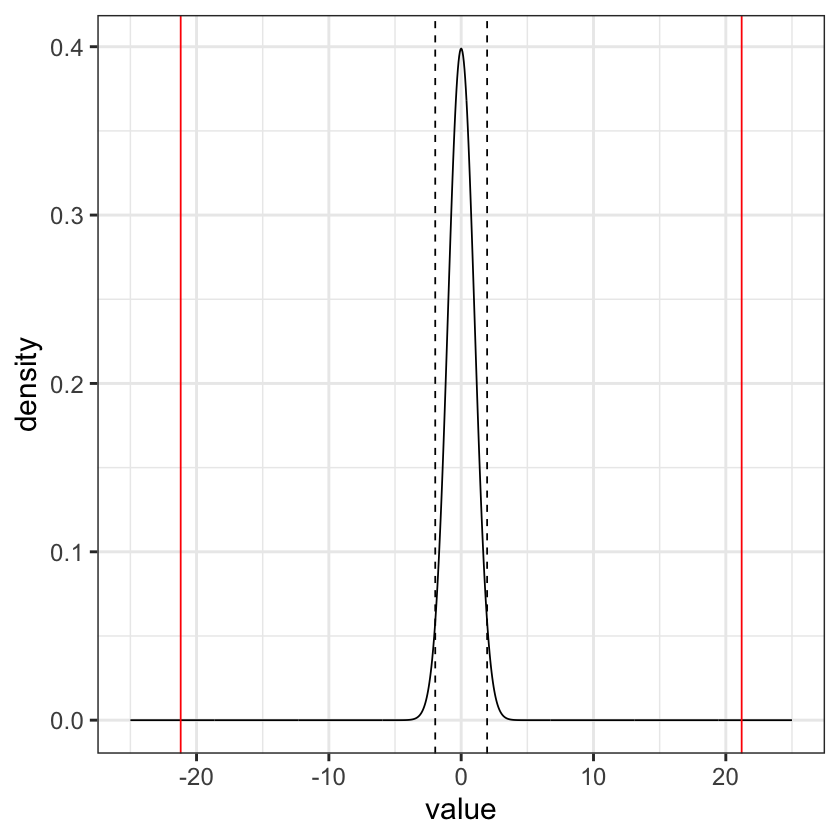

In [14]:
t_dist <- data.frame(value = seq(-25, 25, .05), density = dt(seq(-25, 25, .05), df = (nrow(airquality) - 2)))
gf_line(density ~ value, data = t_dist) %>%
  gf_vline(xintercept = ~ qt(.025, df = (nrow(airquality) - 2)), linetype = 2) %>%
  gf_vline(xintercept = ~ qt(.975, df = (nrow(airquality) - 2)), linetype = 2) %>%
  gf_vline(xintercept = ~ -21.198, color = 'red') %>%
  gf_vline(xintercept = ~ 21.198, color = 'red')

In [15]:
summary(air_lm)


Call:
lm(formula = daily_aqi ~ avg_wind, data = airquality)

Residuals:
   Min     1Q Median     3Q    Max 
-41.71 -14.38  -0.73  12.43  86.84 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  48.2229     0.5155   93.54   <2e-16 ***
avg_wind     -2.2118     0.1043  -21.20   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 18.05 on 4819 degrees of freedom
Multiple R-squared:  0.08528,	Adjusted R-squared:  0.08509 
F-statistic: 449.3 on 1 and 4819 DF,  p-value: < 2.2e-16
